## Lots of Imports for tools that would normally be used in a project

In [102]:
# My created .py files for modularization
import env
import os
import acquire
import prepare
# Array and Dataframes
import numpy as np
import pandas as pd
# Load datasets
from pydataset import data
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [50]:
def compute_metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")


## Questions
#### Create a new notebook, knn_model, and work with the titanic dataset to answer the following:

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

2. Evaluate your results using the model score, confusion matrix, and classification report.
### A: [Accuracy, Precision, Rates](#accuracy-precision-rates), [Metrics](#metrics-for-train)

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 1-3 setting k to 10

5. Run through steps 1-3 setting k to 20

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?
- there is about a .10 point difference in all 3 metrics that will eventually converge with more n_neighbors

7. Which model performs best on our out-of-sample data from validate?
- 5 Or 10 would be our best n_neighbors

## Acquire

In [16]:
# acquiring and preparing data
# prep_titanic has acquire built in
titanic = prepare.prep_titanic()

## Splitting Data

In [17]:
train, validate, test  = prepare.splitter(titanic,target='survived')

In [18]:
# determining baseline
train['survived'].value_counts()

survived
0    307
1    191
Name: count, dtype: int64

## Determining Baseline

In [19]:
# finding baseline accuracy to compare to predictions
train['label'] = ['survived'] == '0'
baseline_accuracy = (train.survived == 0).mean()
baseline_accuracy

0.6164658634538153

## Fit & Train

In [20]:
x_train = train.drop(columns=['survived','label','sex','embarked'])
y_train = train[['survived']]
y_train = y_train.values.ravel()

x_val = validate.drop(columns=['survived','sex','embarked'])
y_val = validate[['survived']]
y_val = y_val.values.ravel()

x_test = test.drop(columns=['survived','sex','embarked'])
y_test = test[['survived']]
y_test = y_test.values.ravel()

In [21]:
knn1 = knn(n_neighbors=5, weights='uniform')

In [23]:
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [94]:
model1_prediction = knn1.predict(x_train)
model1_probability = knn1.predict_proba(x_train)

model1_prediction_val = knn1.predict(x_val)
model1_probability_val = knn1.predict_proba(x_val)

model1_prediction_test = knn1.predict(x_test)
model1_probability_test = knn1.predict_proba(x_test)

## Evaluation

In [44]:
cm = confusion_matrix(y_train,model1_prediction)
cm_disp = ConfusionMatrixDisplay(cm,display_labels=knn1.classes_)

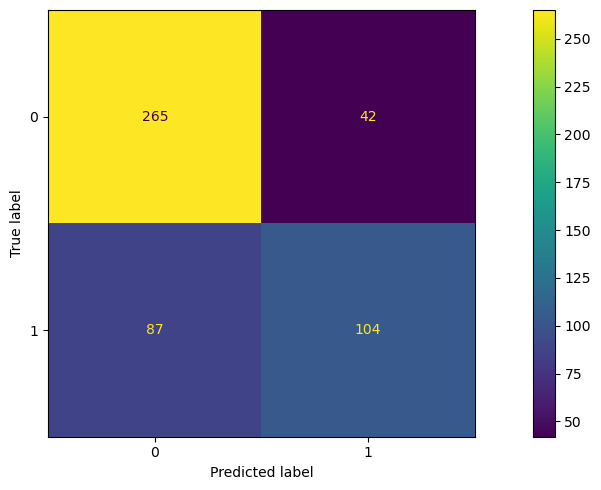

In [45]:
cm_disp.plot()
plt.show()

## Metrics for Train

In [95]:
TN, FP, FN, TP = confusion_matrix(y_train, model1_prediction).ravel()
print(classification_report(y_train,model1_prediction))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       307
           1       0.71      0.54      0.62       191

    accuracy                           0.74       498
   macro avg       0.73      0.70      0.71       498
weighted avg       0.74      0.74      0.73       498



In [53]:
pd.DataFrame(
    confusion_matrix(y_train,model1_prediction),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,265,42
actual survived,87,104


## Accuracy, Precision, Rates

In [49]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.7409638554216867

True Positive Rate/Sensitivity/Recall/Power: 0.5445026178010471
False Positive Rate/False Alarm Ratio/Fall-out: 0.13680781758957655
True Negative Rate/Specificity/Selectivity: 0.8631921824104235
False Negative Rate/Miss Rate: 0.45549738219895286

Precision/PPV: 0.7123287671232876
F1 Score: 0.6172106824925817

Support (0): 191
Support (1): 307


## Metrics for Validate & Test

In [99]:
TN, FP, FN, TP = confusion_matrix(y_val, model1_prediction_val).ravel()
print(classification_report(y_val,model1_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test, model1_prediction_test).ravel()
print(classification_report(y_test,model1_prediction_test))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       132
           1       0.50      0.39      0.44        82

    accuracy                           0.62       214
   macro avg       0.58      0.57      0.57       214
weighted avg       0.60      0.62      0.61       214

              precision    recall  f1-score   support

           0       0.68      0.74      0.70       110
           1       0.51      0.43      0.47        69

    accuracy                           0.62       179
   macro avg       0.59      0.59      0.59       179
weighted avg       0.61      0.62      0.61       179



In [101]:
# validate
pd.DataFrame(
    confusion_matrix(y_val,model1_prediction_val),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,100,32
actual survived,50,32


In [100]:
# test
pd.DataFrame(
    confusion_matrix(y_test,model1_prediction_test),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,81,29
actual survived,39,30


## Comparing K (n_neighbors) In Test Set

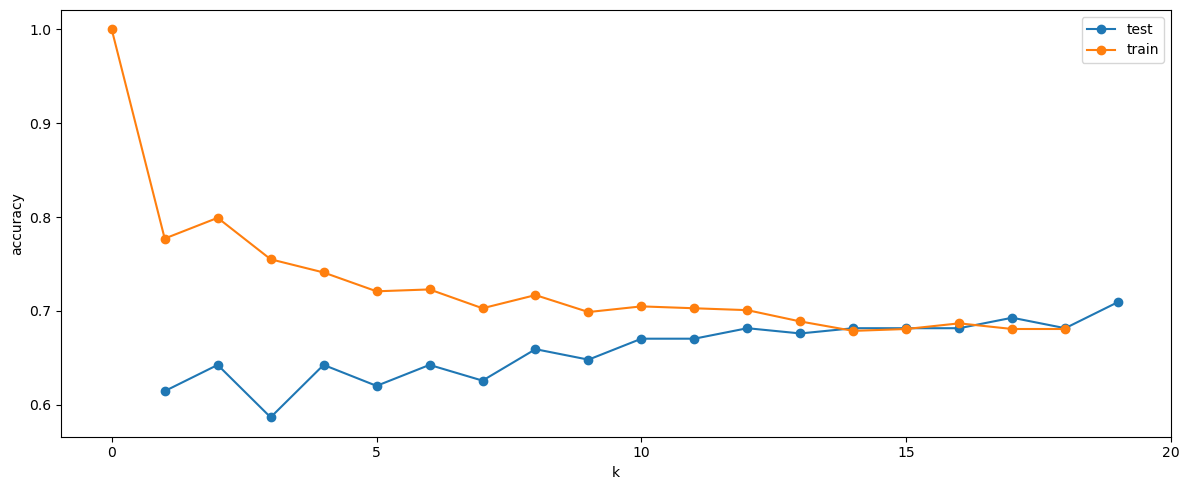

In [90]:
k_range = range(1, 20)
train_scores = []
test_scores = []
for k in k_range:
    knn_loop = knn(n_neighbors = k)
    knn_loop.fit(x_train, y_train)
    train_scores.append(knn_loop.score(x_train, y_train))
    test_scores.append(knn_loop.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, test_scores,'o-',train_scores,'o-')
plt.legend(['test','train'])
plt.xticks([0,5,10,15,20])
plt.show()
